sgd , momentum based gd, ada grad analaysis:

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Loading training and test data
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11056749.54it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1989974.11it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14384163.44it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3972998.70it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# DataLoader
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
# Custom Logistic Regression model
class LogisticRegression(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

# Instantiate the model
n_inputs = 28*28 # 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [5]:
# Defining the loss function
criterion = torch.nn.CrossEntropyLoss()

sgd

In [6]:
# Define parameter variations for each optimizer
param_variations = {
    'SGD_lr_0.001': torch.optim.SGD(log_regr.parameters(), lr=0.001),
    'SGD_lr_0.01': torch.optim.SGD(log_regr.parameters(), lr=0.01),
    # 'Momentum_lr_0.001_mom_0.9': torch.optim.SGD(log_regr.parameters(), lr=0.001, momentum=0.9),
    # 'Momentum_lr_0.001_mom_0.99': torch.optim.SGD(log_regr.parameters(), lr=0.001, momentum=0.99),
    # 'AdaGrad_lr_0.01': torch.optim.Adagrad(log_regr.parameters(), lr=0.01),
    # 'AdaGrad_lr_0.1': torch.optim.Adagrad(log_regr.parameters(), lr=0.1),
}


In [7]:
# Train the model with different optimizer configurations
epochs = 50

for param_name, optimizer in param_variations.items():
    print(f"\nTraining with {param_name}")

    Loss = []
    acc = []

    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = log_regr(images.view(-1, 28*28))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        Loss.append(loss.item())
        correct = 0

        for images, labels in test_loader:
            outputs = log_regr(images.view(-1, 28*28))
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum()

        accuracy = 100 * (correct.item()) / len(test_dataset)
        acc.append(accuracy)
        print(f'Epoch: {epoch}. Loss: {loss.item()}. Accuracy: {accuracy}%')



Training with SGD_lr_0.001
Epoch: 0. Loss: 2.2054409980773926. Accuracy: 62.64%
Epoch: 1. Loss: 2.128476619720459. Accuracy: 72.12%
Epoch: 2. Loss: 2.0276901721954346. Accuracy: 75.78%
Epoch: 3. Loss: 2.013551712036133. Accuracy: 78.24%
Epoch: 4. Loss: 1.983444333076477. Accuracy: 79.92%
Epoch: 5. Loss: 1.9156339168548584. Accuracy: 80.81%
Epoch: 6. Loss: 1.897445559501648. Accuracy: 81.39%
Epoch: 7. Loss: 1.884554386138916. Accuracy: 81.9%
Epoch: 8. Loss: 1.9131309986114502. Accuracy: 82.29%
Epoch: 9. Loss: 1.8553680181503296. Accuracy: 82.61%
Epoch: 10. Loss: 1.8614068031311035. Accuracy: 82.91%
Epoch: 11. Loss: 1.8375301361083984. Accuracy: 83.16%
Epoch: 12. Loss: 1.8015307188034058. Accuracy: 83.33%
Epoch: 13. Loss: 1.7997300624847412. Accuracy: 83.6%
Epoch: 14. Loss: 1.8266422748565674. Accuracy: 83.84%
Epoch: 15. Loss: 1.7546980381011963. Accuracy: 84.01%
Epoch: 16. Loss: 1.8170336484909058. Accuracy: 84.16%
Epoch: 17. Loss: 1.7688992023468018. Accuracy: 84.35%
Epoch: 18. Loss: 

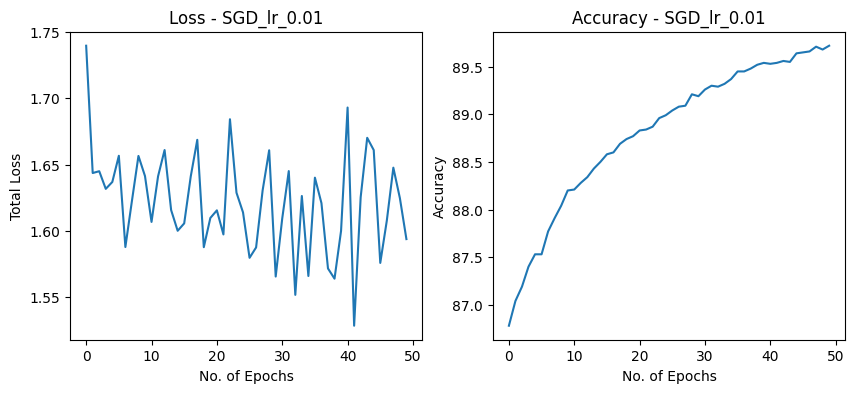

In [8]:
 # Plotting loss and accuracy for the current optimizer configuration
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(Loss)
plt.xlabel("No. of Epochs")
plt.ylabel("Total Loss")
plt.title(f"Loss - {param_name}")

plt.subplot(1, 2, 2)
plt.plot(acc)
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title(f"Accuracy - {param_name}")

plt.show()

momentum based gradient decent:

In [6]:
# Define parameter variations for momentum based GD optimizer
param_variations = {
    'Momentum_lr_0.001_mom_0.9': torch.optim.SGD(log_regr.parameters(), lr=0.001, momentum=0.9),
    'Momentum_lr_0.001_mom_0.99': torch.optim.SGD(log_regr.parameters(), lr=0.001, momentum=0.99),
}

In [7]:
# Train the model with different optimizer configurations
epochs = 50

for param_name, optimizer in param_variations.items():
    print(f"\nTraining with {param_name}")

    Loss = []
    acc = []

    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = log_regr(images.view(-1, 28*28))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        Loss.append(loss.item())
        correct = 0

        for images, labels in test_loader:
            outputs = log_regr(images.view(-1, 28*28))
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum()

        accuracy = 100 * (correct.item()) / len(test_dataset)
        acc.append(accuracy)
        print(f'Epoch: {epoch}. Loss: {loss.item()}. Accuracy: {accuracy}%')


Training with Momentum_lr_0.001_mom_0.9
Epoch: 0. Loss: 1.8892678022384644. Accuracy: 83.07%
Epoch: 1. Loss: 1.8565049171447754. Accuracy: 84.43%
Epoch: 2. Loss: 1.6915076971054077. Accuracy: 85.47%
Epoch: 3. Loss: 1.699407696723938. Accuracy: 86.17%
Epoch: 4. Loss: 1.6637623310089111. Accuracy: 86.4%
Epoch: 5. Loss: 1.8093782663345337. Accuracy: 86.71%
Epoch: 6. Loss: 1.7328189611434937. Accuracy: 87.03%
Epoch: 7. Loss: 1.7087945938110352. Accuracy: 87.16%
Epoch: 8. Loss: 1.6824924945831299. Accuracy: 87.42%
Epoch: 9. Loss: 1.6780633926391602. Accuracy: 87.49%
Epoch: 10. Loss: 1.6435151100158691. Accuracy: 87.69%
Epoch: 11. Loss: 1.6248902082443237. Accuracy: 87.87%
Epoch: 12. Loss: 1.6066306829452515. Accuracy: 88.0%
Epoch: 13. Loss: 1.648459553718567. Accuracy: 88.1%
Epoch: 14. Loss: 1.5997158288955688. Accuracy: 88.21%
Epoch: 15. Loss: 1.7003120183944702. Accuracy: 88.27%
Epoch: 16. Loss: 1.6062753200531006. Accuracy: 88.42%
Epoch: 17. Loss: 1.6862528324127197. Accuracy: 88.48%
Ep

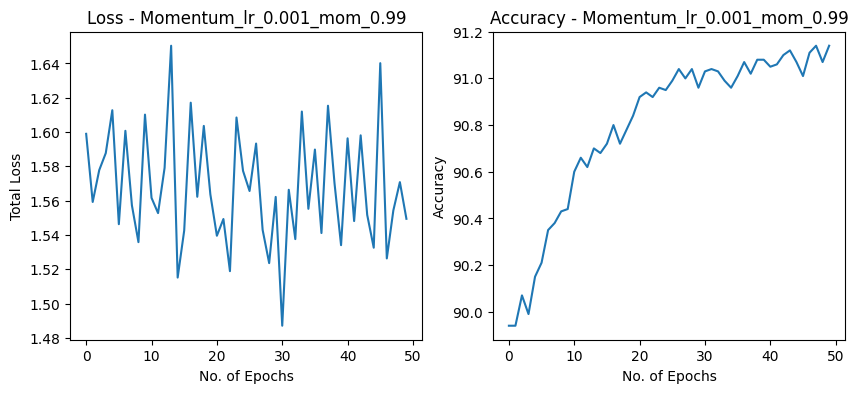

In [8]:
 # Plotting loss and accuracy for the current optimizer configuration
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(Loss)
plt.xlabel("No. of Epochs")
plt.ylabel("Total Loss")
plt.title(f"Loss - {param_name}")

plt.subplot(1, 2, 2)
plt.plot(acc)
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title(f"Accuracy - {param_name}")

plt.show()

In [9]:
# Define parameter variations for each optimizer
param_variations = {
    'AdaGrad_lr_0.01': torch.optim.Adagrad(log_regr.parameters(), lr=0.01),
    'AdaGrad_lr_0.1': torch.optim.Adagrad(log_regr.parameters(), lr=0.1),
}

In [11]:
# Train the model with different optimizer configurations
epochs = 50

for param_name, optimizer in param_variations.items():
    print(f"\nTraining with {param_name}")

    Loss = []
    acc = []

    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = log_regr(images.view(-1, 28*28))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        Loss.append(loss.item())
        correct = 0

        for images, labels in test_loader:
            outputs = log_regr(images.view(-1, 28*28))
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum()

        accuracy = 100 * (correct.item()) / len(test_dataset)
        acc.append(accuracy)
        print(f'Epoch: {epoch}. Loss: {loss.item()}. Accuracy: {accuracy}%')


Training with AdaGrad_lr_0.01
Epoch: 0. Loss: 1.5412920713424683. Accuracy: 91.93%
Epoch: 1. Loss: 1.5470525026321411. Accuracy: 91.94%
Epoch: 2. Loss: 1.5117874145507812. Accuracy: 91.93%
Epoch: 3. Loss: 1.550981044769287. Accuracy: 91.94%
Epoch: 4. Loss: 1.5109424591064453. Accuracy: 91.95%
Epoch: 5. Loss: 1.493920087814331. Accuracy: 91.95%
Epoch: 6. Loss: 1.5380522012710571. Accuracy: 91.94%
Epoch: 7. Loss: 1.519335389137268. Accuracy: 91.95%
Epoch: 8. Loss: 1.5860285758972168. Accuracy: 91.95%
Epoch: 9. Loss: 1.559406042098999. Accuracy: 91.94%
Epoch: 10. Loss: 1.5186156034469604. Accuracy: 91.94%
Epoch: 11. Loss: 1.5291118621826172. Accuracy: 91.92%
Epoch: 12. Loss: 1.5414122343063354. Accuracy: 91.94%
Epoch: 13. Loss: 1.5400124788284302. Accuracy: 91.94%
Epoch: 14. Loss: 1.5136140584945679. Accuracy: 91.92%
Epoch: 15. Loss: 1.5122281312942505. Accuracy: 91.93%
Epoch: 16. Loss: 1.4837685823440552. Accuracy: 91.93%
Epoch: 17. Loss: 1.4860904216766357. Accuracy: 91.93%
Epoch: 18. 

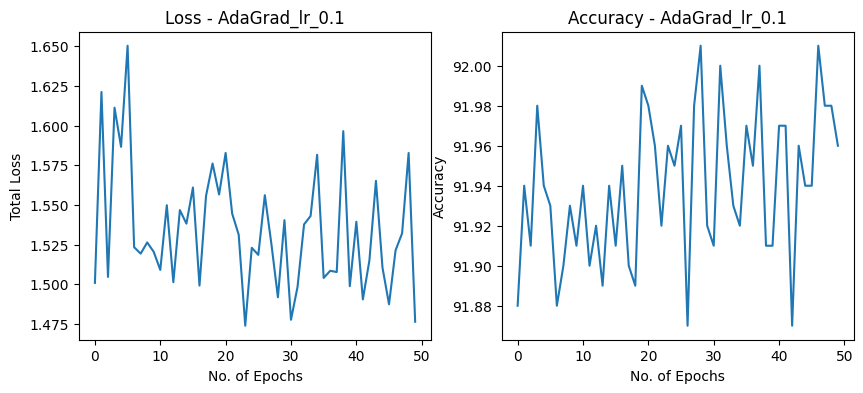

In [12]:
 # Plotting loss and accuracy for the current optimizer configuration
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(Loss)
plt.xlabel("No. of Epochs")
plt.ylabel("Total Loss")
plt.title(f"Loss - {param_name}")

plt.subplot(1, 2, 2)
plt.plot(acc)
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title(f"Accuracy - {param_name}")

plt.show()